about the dataset

1. TimeAge - time series data on the patients by age
2. TimeProvince - time series data by administrative region
3. Region - metadata on each region
4. TimeGender - time series data on the patients by sex
5. Time - time series data on the tests and the results
6. Case - data on infection cases (path of transmission)
7. Weather - time series data on the weather in each region
8. PatientInfo - sparse data on the profiles of some confirmed patients
9. SeoulFloating - time series data on the floating population in Seoul
10. SearchTrend - time series data on the search keywords related to COVID-19 and other respiratory diseases
11. Policy - sparse data on the policies implemented by S.Korean government on COVID-19
-. PatientRoute - saprse data on the patients' activities before being confirmed

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Files Path

In [2]:
import os
for dirname, _, filenames in os.walk('corona 20'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


corona 20\Case.csv
corona 20\PatientInfo.csv
corona 20\Policy.csv
corona 20\Region.csv
corona 20\SearchTrend.csv
corona 20\SeoulFloating.csv
corona 20\Time.csv
corona 20\TimeAge.csv
corona 20\TimeGender.csv
corona 20\TimeProvince.csv
corona 20\Weather.csv
corona 20\.ipynb_checkpoints\Case-checkpoint.csv


### Age

In [3]:
age_df = pd.read_csv(r'E:\JN\corona 20\TimeAge.csv')

In [4]:
pd.concat([age_df.head(5), age_df.tail(5)])

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82
1088,2020-06-30,0,80s,556,139


In [5]:
age_unique = age_df['age'].unique()
age_df['date'] = pd.to_datetime(age_df['date'])
date_range = (max(age_df['date']) - min(age_df['date'])).days + 1
print(f'age values : {age_unique}')
print(f'date range : {date_range}')

age values : ['0s' '10s' '20s' '30s' '40s' '50s' '60s' '70s' '80s']
date range : 121


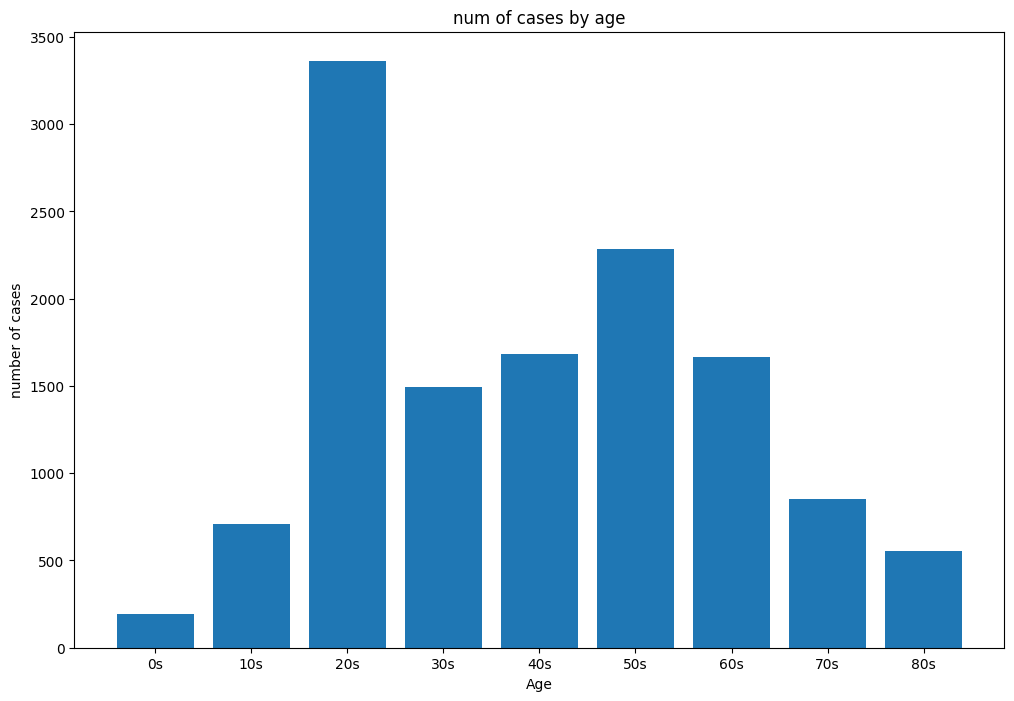

In [6]:
plt.figure(figsize=(12,8))
plt.bar(age_df['age'],age_df['confirmed'])
plt.title('num of cases by age')
plt.xlabel('Age')
plt.ylabel('number of cases')
plt.show()

 <pre>we see that the 20s group has the highest number of cases
 this come from many reason
 1- they are the most group has social activities
 2- they are the most group go out for education like universities
 3- they have high romantic tendency</pre>

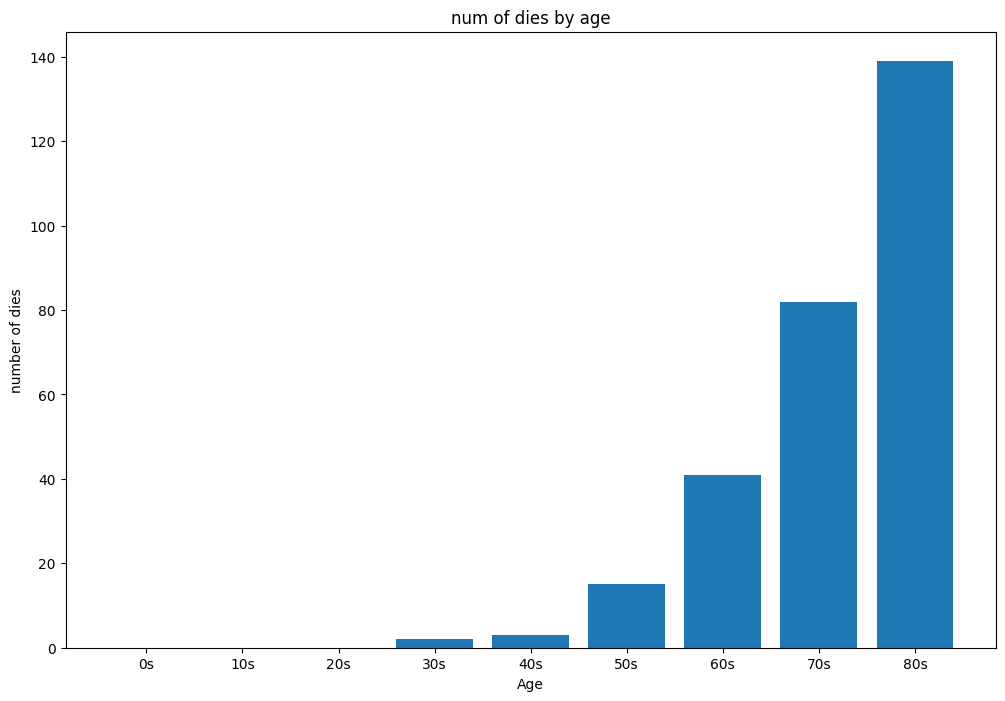

In [7]:
plt.figure(figsize=(12,8))
plt.bar(age_df['age'],age_df['deceased'])
plt.title('num of dies by age')
plt.xlabel('Age')
plt.ylabel('number of dies')
plt.show()

<pre>
    the 80s group has the highest number of dies and decrease with age decreasing
    80>70>60>..
</pre>

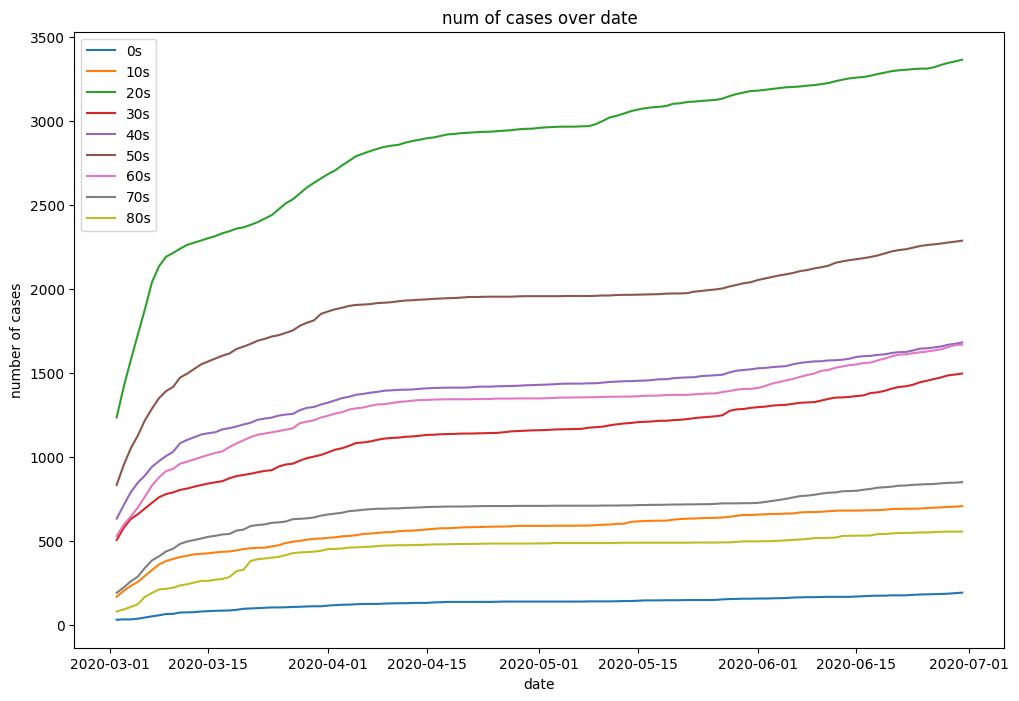

In [8]:
age_group = age_df.groupby('age',as_index=False)
plt.figure(figsize=(12,8))
for name,group in age_group:
    plt.plot(group['date'],group['confirmed'],label=name)
plt.title('num of cases over date')
plt.xlabel('date')
plt.ylabel('number of cases')
plt.legend()
plt.show()

<pre>
    * number of 20s cases increases faster than the others
    * the rate up to 2020-03-08 is high , after that it becomes smaller
    * As of 2020-06-30 most groups show upward curves
</pre>

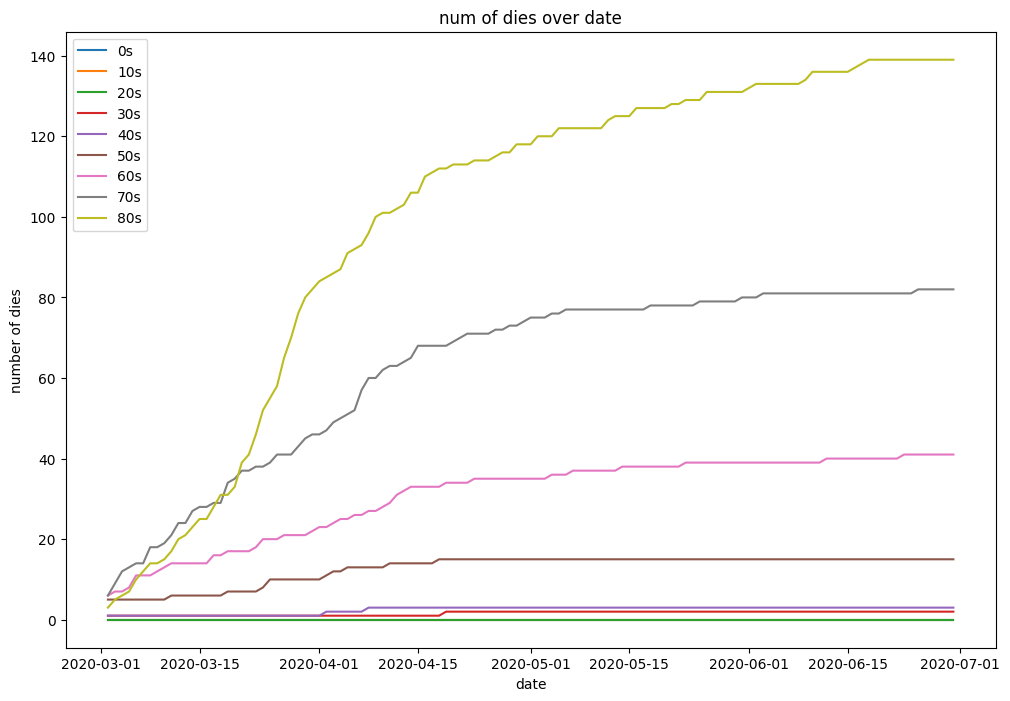

In [9]:
age_group = age_df.groupby('age',as_index=False)
plt.figure(figsize=(12,8))
for name,group in age_group:
    plt.plot(group['date'],group['deceased'],label=name)
plt.title('num of dies over date')
plt.xlabel('date')
plt.ylabel('number of dies')
plt.legend()
plt.show()

In [10]:
age_df[age_df['age'] == '20s']['deceased'].unique()

array([0])

<pre>
    we see that there no dies in 20s group
    the dies in 30s and 40s are very low
    the rate up to 2020-04-03 is high , after that it becomes smaller smothly
    
</pre>

## Region

In [11]:
region_df = pd.read_csv(r'E:\JN\corona 20\TimeProvince.csv')

In [12]:
pd.concat([region_df.head(3),region_df.tail(3)])

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0
2770,2020-06-30,0,Jeju-do,19,16,0


In [13]:
region_group = region_df.province.unique()
region_df['date'] = pd.to_datetime(region_df['date'])
date_range = (max(region_df['date']) - min(region_df['date'])).days + 1
print(f'regions : {region_group}')
print(f'number of regions : {len(region_group)}')
print(f'date range : {date_range}')
print(f"start date : {min(region_df['date']).date()} and end date : {max(region_df['date']).date()}")


regions : ['Seoul' 'Busan' 'Daegu' 'Incheon' 'Gwangju' 'Daejeon' 'Ulsan' 'Sejong'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do']
number of regions : 17
date range : 163
start date : 2020-01-20 and end date : 2020-06-30


In [14]:
region_df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,2771,2020-04-10 00:00:00,2020-01-20 00:00:00,2020-02-29 00:00:00,2020-04-10 00:00:00,2020-05-21 00:00:00,2020-06-30 00:00:00,NaN
time,2771.0,4.122699,0.0,0.0,0.0,16.0,16.0,6.998873
confirmed,2771.0,444.308192,0.0,9.0,42.0,133.0,6906.0,1360.890963
released,2771.0,320.726453,0.0,1.0,21.0,92.0,6700.0,1126.041255
deceased,2771.0,9.239986,0.0,0.0,0.0,1.0,189.0,32.638615


because the number of confirmed and released cases are accumulated, we just deal with last updated date

In [15]:
last_update = region_df[region_df['date'] == region_df.date.max()].sort_values(by='confirmed',ascending=False)
last_update.set_index(np.arange(1,len(last_update)+1),inplace=True)
last_update.head(17)

,date,time,province,confirmed,released,deceased
1,2020-06-30,0,Daegu,6906,6700,189
2,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
3,2020-06-30,0,Seoul,1312,985,7
4,2020-06-30,0,Gyeonggi-do,1207,931,23
5,2020-06-30,0,Incheon,341,290,1
6,2020-06-30,0,Chungcheongnam-do,167,150,0
7,2020-06-30,0,Busan,154,142,3
8,2020-06-30,0,Gyeongsangnam-do,134,128,0
9,2020-06-30,0,Daejeon,117,44,1
10,2020-06-30,0,Chungcheongbuk-do,65,60,0


<pre>
    we see that Daegu has the most number of cases and dies then Gyeongsangbuk-do
    let's see the perectige
</pre>

In [16]:
last_update.loc['18',:] = last_update.iloc[6:, 3:].sum()
last_update.loc['18','province'] = 'Others'
last_update['proportion'] = round(last_update.confirmed / sum(last_update.confirmed) * 100, 2)
last_update = last_update.sort_values('proportion', ascending=False)
last_update

,date,time,province,confirmed,released,deceased,proportion
1,2020-06-30,0.0,Daegu,6906.0,6700.0,189.0,53.83
2,2020-06-30,0.0,Gyeongsangbuk-do,1389.0,1328.0,54.0,10.83
3,2020-06-30,0.0,Seoul,1312.0,985.0,7.0,10.23
4,2020-06-30,0.0,Gyeonggi-do,1207.0,931.0,23.0,9.41
18,NaT,NaN,Others,754.0,613.0,8.0,5.88
5,2020-06-30,0.0,Incheon,341.0,290.0,1.0,2.66
6,2020-06-30,0.0,Chungcheongnam-do,167.0,150.0,0.0,1.30
7,2020-06-30,0.0,Busan,154.0,142.0,3.0,1.20
8,2020-06-30,0.0,Gyeongsangnam-do,134.0,128.0,0.0,1.04
9,2020-06-30,0.0,Daejeon,117.0,44.0,1.0,0.91


In [17]:
last_update = last_update[last_update.proportion > last_update.iloc[5, -1]]
last_update

,date,time,province,confirmed,released,deceased,proportion
1,2020-06-30,0.0,Daegu,6906.0,6700.0,189.0,53.83
2,2020-06-30,0.0,Gyeongsangbuk-do,1389.0,1328.0,54.0,10.83
3,2020-06-30,0.0,Seoul,1312.0,985.0,7.0,10.23
4,2020-06-30,0.0,Gyeonggi-do,1207.0,931.0,23.0,9.41
18,NaT,NaN,Others,754.0,613.0,8.0,5.88


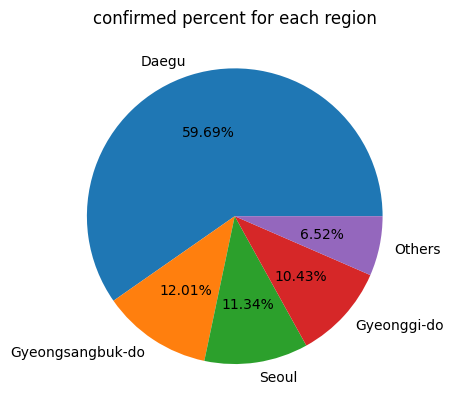

In [18]:
plt.pie(last_update.proportion, labels=last_update.province , autopct='%.2f%%' )
plt.title('confirmed percent for each region')
plt.show()

<pre>
    Daegu has the most confirmed cases about 60%
</pre>

let's see the confirmed cases over time with Daegu and without it

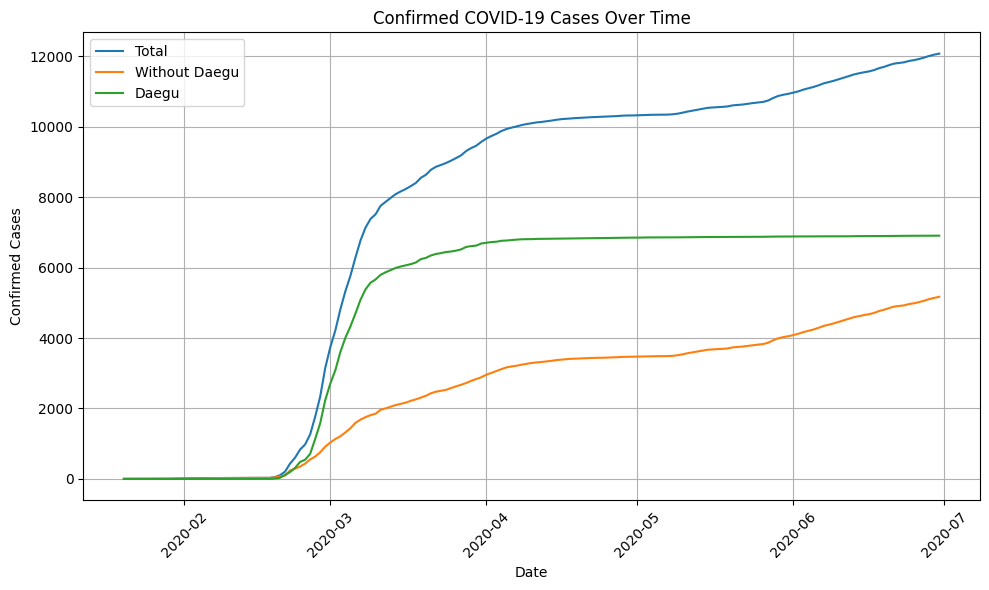

In [19]:
# Separate data
region_df_no_Daegu = region_df[region_df.province != 'Daegu']
Daegu_only = region_df[region_df.province == 'Daegu']

# Aggregate totals
total = region_df.groupby('date')['confirmed'].sum()
no_Daegu = region_df_no_Daegu.groupby('date')['confirmed'].sum()
Daegu = Daegu_only.groupby('date')['confirmed'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(total.index, total.values, label='Total')
plt.plot(no_Daegu.index, no_Daegu.values, label='Without Daegu')
plt.plot(Daegu.index, Daegu.values, label='Daegu')

plt.title('Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<pre>
    we see that after 2020-03 Daegu cases start to stop smothly
    the total curve after 2020-03 increase due to the increasing of other regions
</pre>

## Sex

In [20]:
sex_df = pd.read_csv(r'E:\JN\corona 20\TimeGender.csv')

In [21]:
sex_df.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


the number of confirmed	and deceased are accumulative so we will depend on last day

In [22]:
last_update = sex_df[sex_df['date'] == sex_df.date.max()].sort_values(by='confirmed',ascending=False)
last_update.set_index((np.arange(1,len(last_update)+1)),inplace=True)
last_update.drop(columns=['date','time'],inplace=True)
last_update.head()

,sex,confirmed,deceased
1,female,7305,131
2,male,5495,151


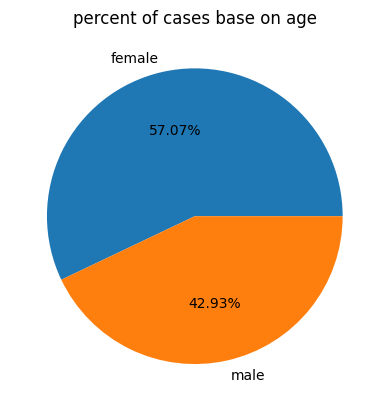

In [23]:
last_update['proportion'] = (last_update.confirmed / last_update.confirmed.sum())*100
plt.pie(last_update['proportion'],labels=last_update.sex,autopct='%.2f%%')
plt.title('percent of cases base on age')
plt.show()

<pre>
    we see that the number of females is high than the number of males
</pre>

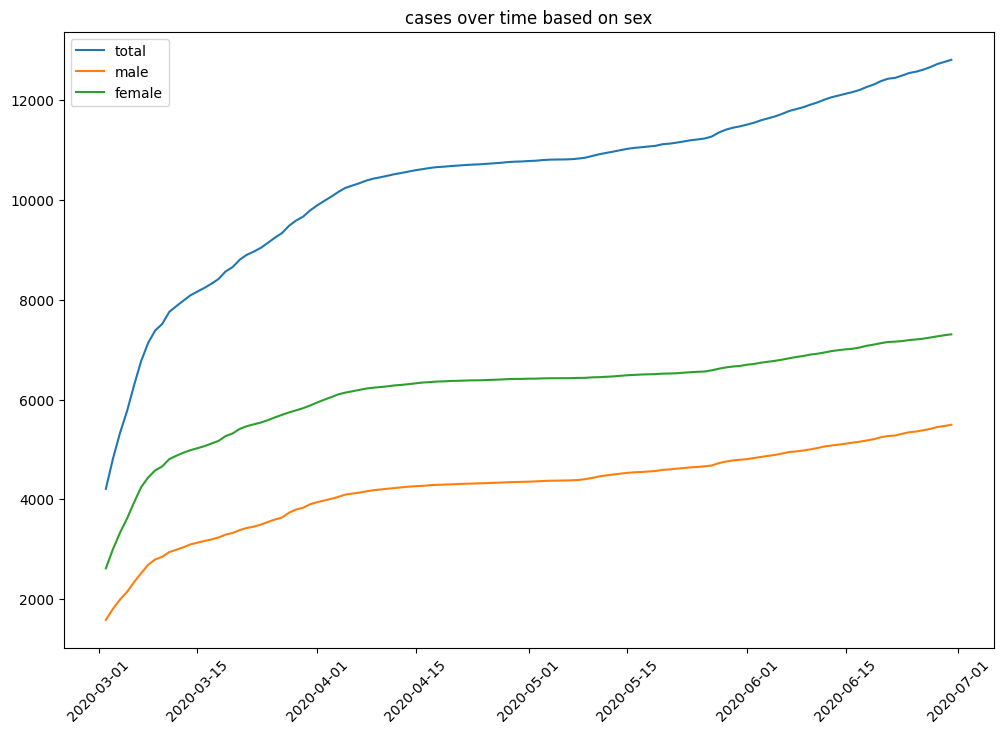

In [24]:
import matplotlib.dates as mdates
sex_df['date'] = pd.to_datetime(sex_df['date'])
male_df = sex_df[sex_df.sex == 'male']
female_df = sex_df[sex_df.sex == 'female']
plt.figure(figsize=(12,8))
plt.plot(sex_df.date.unique(),sex_df.groupby('date')['confirmed'].sum(),label='total')
plt.plot(male_df.date.unique(),male_df.groupby('date')['confirmed'].sum(),label='male')
plt.plot(female_df.date.unique(),female_df.groupby('date')['confirmed'].sum(),label='female')
plt.title('cases over time based on sex')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # auto spacing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

<pre>
    we see that the curve after 2020-03-09 becomes flattened
    the curve start to increasing from moth 6
</pre>

#### let's do the same to deceased

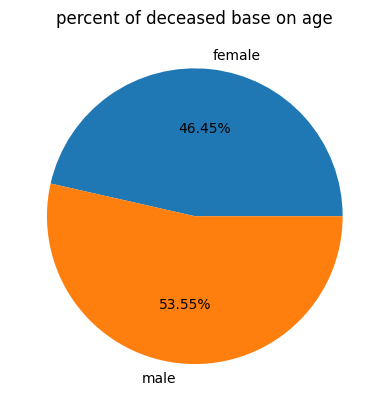

In [25]:
last_update['deceased_proportion'] = (last_update.deceased / last_update.deceased.sum())*100
plt.pie(last_update['deceased_proportion'],labels=last_update.sex,autopct='%.2f%%')
plt.title('percent of deceased base on age')
plt.show()

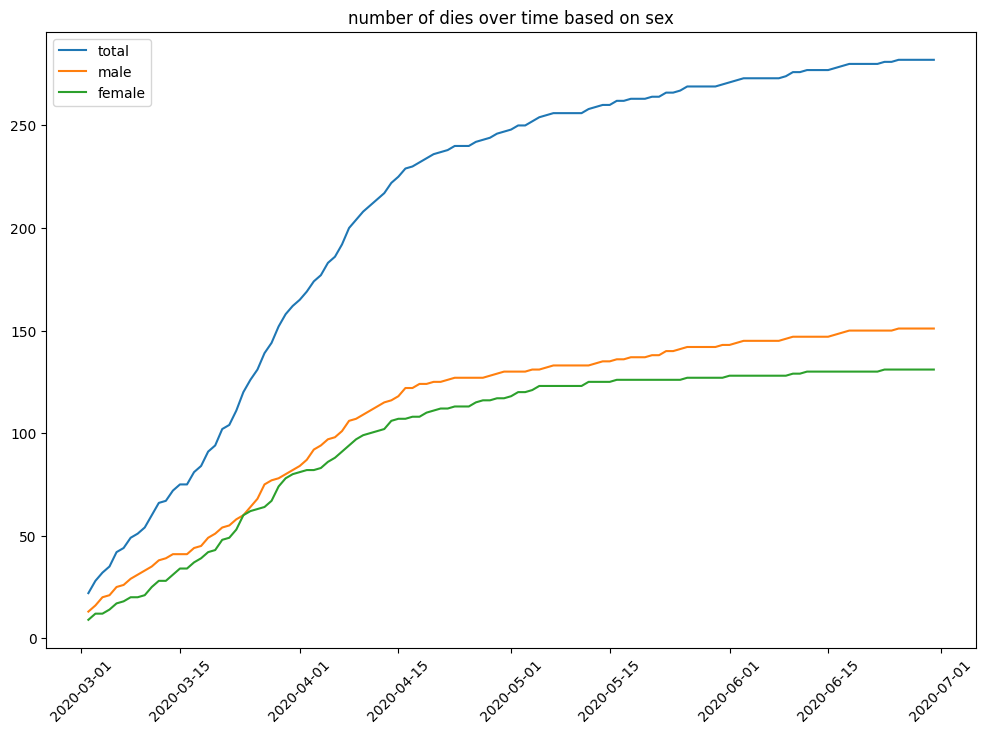

In [26]:
plt.figure(figsize=(12,8))
plt.plot(sex_df.date.unique(),sex_df.groupby('date')['deceased'].sum(),label='total')
plt.plot(male_df.date.unique(),male_df.groupby('date')['deceased'].sum(),label='male')
plt.plot(female_df.date.unique(),female_df.groupby('date')['deceased'].sum(),label='female')
plt.title('number of dies over time based on sex')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # auto spacing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

<pre>
    number of deceased males are higher
    the number of dies after 2020-04-14 becomes flattened, and return to increase before month 6
</pre>

## Weather

In [27]:
weather_df = pd.read_csv(r'E:\JN\corona 20\Weather.csv')

In [28]:
weather_df.head(5)

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [29]:
region_group = weather_df.province.unique()
weather_df['date'] = pd.to_datetime(weather_df['date'])
date_range = (max(weather_df['date']) - min(weather_df['date'])).days + 1
print('regions: ', region_group)
print('date range' ,date_range)
print(f'first day: {min(weather_df['date']).date()} and last day: {max(weather_df['date']).date()}')

regions:  ['Seoul' 'Busan' 'Daegu' 'Gwangju' 'Incheon' 'Daejeon' 'Ulsan'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do' 'Chunghceongbuk-do']
date range 1642
first day: 2016-01-01 and last day: 2020-06-29


In [30]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26256 non-null  float64       
 4   min_temp               26266 non-null  float64       
 5   max_temp               26268 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


<pre>
    there are few missing data that we can fill it
</pre>

In [31]:
weather_df.describe().T

,count,mean,min,25%,50%,75%,max,std
code,26271.0,32124.662175,10000.0,13500.0,20000.0,50500.0,70000.0,20313.487872
date,26271,2018-03-31 12:04:51.058581760,2016-01-01 00:00:00,2017-02-14 00:00:00,2018-04-01 00:00:00,2019-05-16 00:00:00,2020-06-29 00:00:00,NaN
avg_temp,26256.0,13.859423,-14.8,6.0,14.6,21.9,33.9,9.520334
min_temp,26266.0,9.665396,-19.2,1.4,9.9,18.2,30.3,9.896768
max_temp,26268.0,18.778826,-11.9,10.9,19.8,26.7,40.0,9.586279
precipitation,26271.0,1.486799,0.0,0.0,0.0,0.0,266.0,8.189636
max_wind_speed,26262.0,5.1095,1.0,3.8,4.7,6.0,29.4,2.016256
most_wind_direction,26242.0,195.900084,20.0,90.0,200.0,290.0,360.0,106.166524
avg_relative_humidity,26251.0,65.695566,10.4,53.6,66.9,78.6,100.0,17.195339


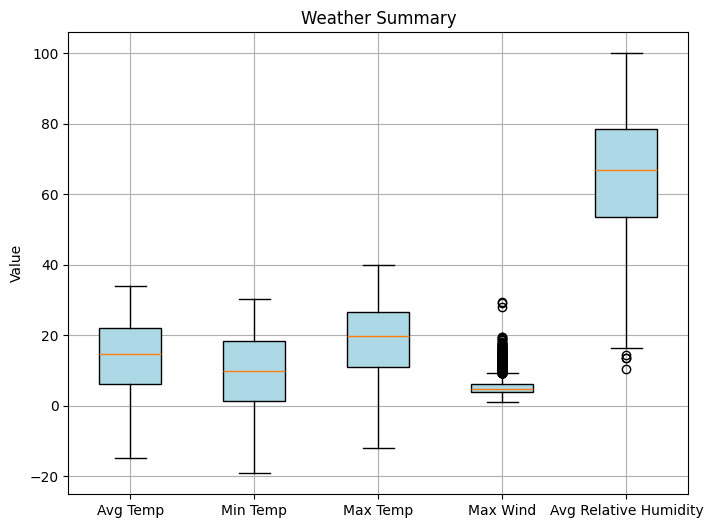

In [32]:
data = [
    weather_df['avg_temp'].dropna(),
    weather_df['min_temp'].dropna(),
    weather_df['max_temp'].dropna(),
    weather_df['max_wind_speed'].dropna(),
     weather_df['avg_relative_humidity'].dropna()

]

plt.figure(figsize=(8, 6))
plt.boxplot(data,
            tick_labels=['Avg Temp', 'Min Temp', 'Max Temp', 'Max Wind','Avg Relative Humidity'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title("Weather Summary")
plt.ylabel("Value")
plt.grid(True)
plt.show()

<pre>
    there arent exist outliers in temp columns so we fill it by mean
    there exist outliers in max wind and Humidity columns so we fill them by median
</pre>

In [33]:
temp_cols = ['avg_temp', 'min_temp', 'max_temp']
for col in temp_cols:
    weather_df[col].fillna(weather_df[col].mean(), inplace=True)

other_cols = ['max_wind_speed', 'avg_relative_humidity']
for col in other_cols:
    weather_df[col].fillna(weather_df[col].median(), inplace=True)

In [34]:
## since most_wind_direction column is discrete numeric so we fill null values by mode
weather_df['most_wind_direction'].fillna(weather_df['most_wind_direction'].mode()[0], inplace=True)

In [35]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26271 non-null  float64       
 8   most_wind_direction    26271 non-null  float64       
 9   avg_relative_humidity  26271 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


<pre>
    since the date start from 2016 to 2020-6,we just interseted about the date starting from 2020 because this is the corona season
</pre>

In [36]:
weather_2020_plus = weather_df[weather_df['date'].dt.year >= 2020]
weather_2020_plus.reset_index(drop=True, inplace=True)
weather_2020_plus

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2020-01-01,-2.2,-6.5,0.3,0.0,2.6,50.0,64.4
1,11000,Busan,2020-01-01,1.9,-3.2,7.8,0.0,5.1,340.0,44.0
2,12000,Daegu,2020-01-01,0.2,-4.9,4.6,0.0,5.6,270.0,53.3
3,13000,Gwangju,2020-01-01,-0.3,-4.9,5.7,0.0,4.3,50.0,58.0
4,14000,Incheon,2020-01-01,-1.4,-5.4,1.9,0.0,3.8,160.0,66.6
...,...,...,...,...,...,...,...,...,...,...
2891,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
2892,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
2893,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
2894,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [40]:
## there is an eror in province the Chunghceongbuk-do are named incorrectly so it exists twice in weather dataframe
weather_df['province'] = weather_df['province'].replace('Chunghceongbuk-do', 'Chungcheongbuk-do')
weather_df['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
       'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'], dtype=object)

In [44]:
## we need to sort the weather regions by the cases number in region data frame but there is one problem the Sejong region doesn't exist
## in weather data frame so we drop columns that contain Sejong in region
new_region_df = region_df[region_df.province != 'Sejong']

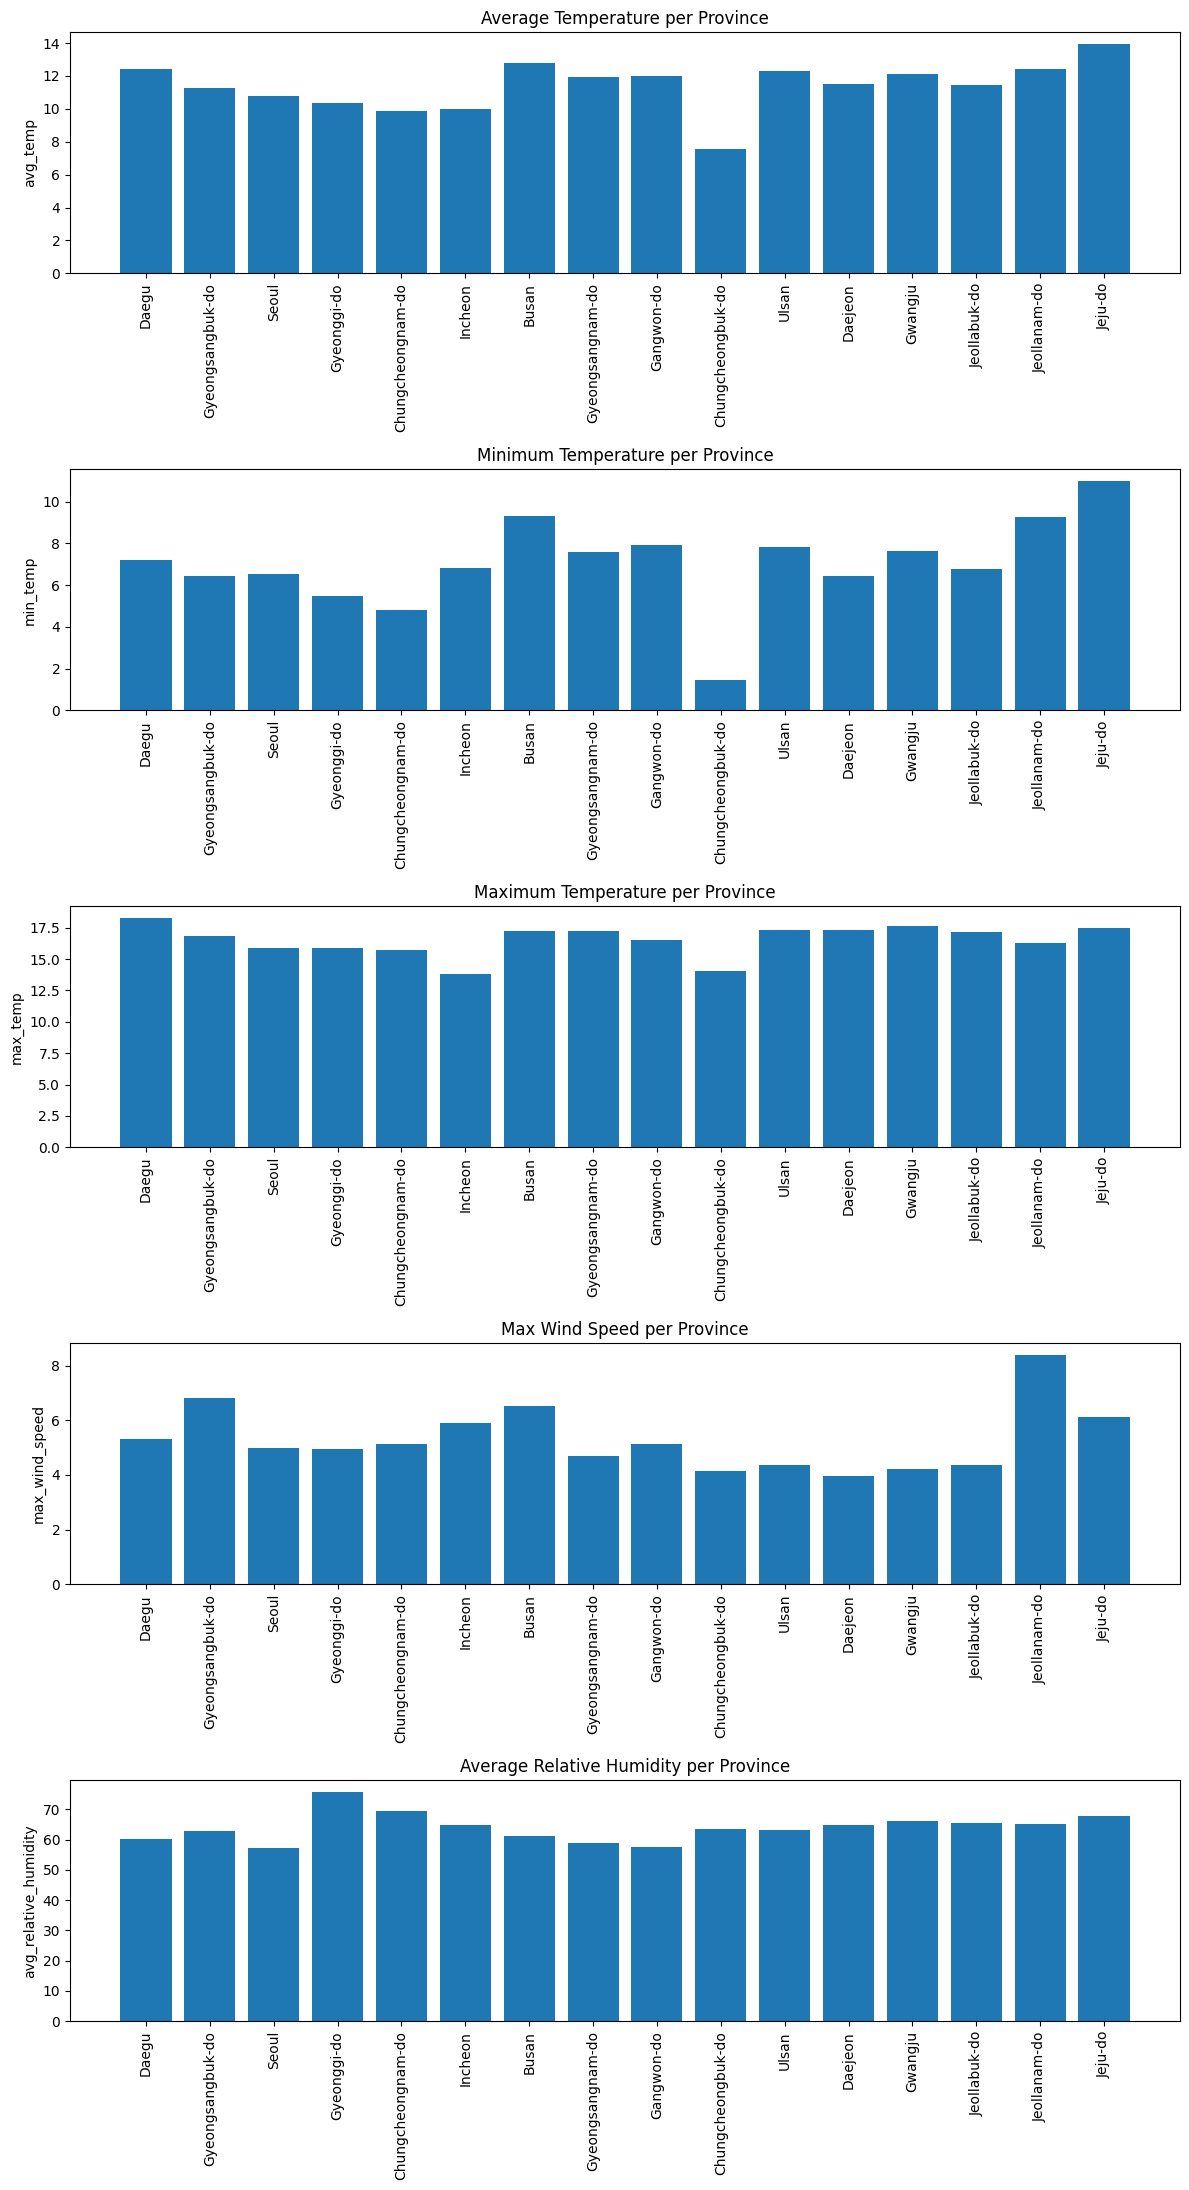

In [45]:
columns = ['avg_temp', 'min_temp', 'max_temp', 'max_wind_speed', 'avg_relative_humidity']
titles = [
    "Average Temperature per Province",
    "Minimum Temperature per Province",
    "Maximum Temperature per Province",
    "Max Wind Speed per Province",
    "Average Relative Humidity per Province"
]
# Step 1: get total confirmed cases per province
confirmed_total = new_region_df.groupby('province')['confirmed'].sum()

# Step 2: sort provinces by descending confirmed cases
sorted_provinces = confirmed_total.sort_values(ascending=False).index
# Group the data by province and calculate the mean
grouped = weather_2020_plus.groupby('province')[columns].mean()

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 22))

for i, col in enumerate(columns):
    sorted_data = grouped.loc[sorted_provinces, col]  # reorder the Series by sorted provinces
    axs[i].bar(sorted_data.index, sorted_data.values)
    axs[i].set_title(titles[i])
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

<pre>
    weak negative correlation between avergae temperature and cases number(the colder , the more cases)
    no correlation between max wind speed & humidity and number of cases
</pre>